In [43]:
# Import Dependencies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    recall_score,
    precision_score,
    accuracy_score)
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [44]:
url = 'https://www.kaggle.com/mdabbert/ultimate-ufc-dataset?select=ufc-master.csv'
# Pass data through pandas and into a df.
data = pd.read_csv('Data/ufc-master.csv')
ufcdata = pd.DataFrame(data)
# Show basic information about the formatted df.
print("The shape of the DataFrame is",ufcdata.shape)
print("Each fighter has their statistics held in the following columns",ufcdata.columns)
# Show an example row of the df to better understand the data.
pd.set_option('display.max_columns', None)

# Since this is a very large dataset, there are many NaN values for some of the columns as they don't apply to a each fight.
# In this case, there are columns for the official UFC rankings, but each fight only takes place in 1 division, where only 15 fighters are ranked.
# Thus, there are many categorical columns that could just be represented by 0.
# In order to fix this issue, we use the .fillna function to fill empty values with a 0.

ufcdata = ufcdata.fillna(0)

The shape of the DataFrame is (4896, 119)
Each fighter has their statistics held in the following columns Index(['R_fighter', 'B_fighter', 'R_odds', 'B_odds', 'R_ev', 'B_ev', 'date',
       'location', 'country', 'Winner',
       ...
       'finish_details', 'finish_round', 'finish_round_time',
       'total_fight_time_secs', 'r_dec_odds', 'b_dec_odds', 'r_sub_odds',
       'b_sub_odds', 'r_ko_odds', 'b_ko_odds'],
      dtype='object', length=119)


In [45]:
# Next, to further clean the data, we remove the columns at the end of the df because they are only filled out for about half the fights.
# The columns we want to remove begin with "better_rank" and end at the last column of the df.
# This is a seperate issue from the NaN issue becuase filling these columns with 0 would lead to summation errors.

ufcdata.columns.get_loc("better_rank")
ufcdata.drop(ufcdata.iloc[:,107:138],inplace = True, axis = 1)
display(ufcdata.head())


,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,title_bout,weight_class,gender,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_landed,B_avg_TD_pct,B_longest_win_streak,B_losses,B_total_rounds_fought,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_landed,R_avg_TD_pct,R_longest_win_streak,R_losses,R_total_rounds_fought,R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age,B_age,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,constant_1,B_match_weightclass_rank,R_match_weightclass_rank,R_Women's Flyweight_rank,R_Women's Featherweight_rank,R_Women's Strawweight_rank,R_Women's Bantamweight_rank,R_Heavyweight_rank,R_Light Heavyweight_rank,R_Middleweight_rank,R_Welterweight_rank,R_Lightweight_rank,R_Featherweight_rank,R_Bantamweight_rank,R_Flyweight_rank,R_Pound-for-Pound_rank,B_Women's Flyweight_rank,B_Women's Featherweight_rank,B_Women's Strawweight_rank,B_Women's Bantamweight_rank,B_Heavyweight_rank,B_Light Heavyweight_rank,B_Middleweight_rank,B_Welterweight_rank,B_Lightweight_rank,B_Featherweight_rank,B_Bantamweight_rank,B_Flyweight_rank,B_Pound-for-Pound_rank
0,Thiago Santos,Johnny Walker,-150.0,130,66.666667,130.000000,2021-10-02,"Las Vegas, Nevada, USA",USA,Red,False,Light Heavyweight,MALE,5,0,1,0,3.42,0.59,0.7,0.24,1.00,4,2,11,0,0,0,1,4,0,0,5,Orthodox,198.12,208.28,205,3,0,0,3.95,0.48,0.1,0.61,0.36,4,8,43,1,0,0,2,11,0,0,13,Orthodox,187.96,193.04,205,37,29,-3,1,0,-8,-6,-32,-1,-7,0,10.16,15.24,-8,-0.53,0.6,-0.37,1,1,10.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Alex Oliveira,Niko Price,170.0,-200,170.000000,50.000000,2021-10-02,"Las Vegas, Nevada, USA",USA,Blue,False,Welterweight,MALE,3,2,0,0,5.16,0.42,0.8,0.79,0.22,2,5,24,0,0,0,0,4,2,0,6,Orthodox,182.88,193.04,170,2,0,0,2.97,0.51,0.5,2.27,0.37,4,8,44,0,0,1,3,4,3,0,11,Orthodox,180.34,193.04,170,33,32,0,0,-2,-5,-3,-20,0,0,-1,2.54,0.00,-1,2.19,0.3,-1.48,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Misha Cirkunov,Krzysztof Jotko,110.0,-130,110.000000,76.923077,2021-10-02,"Las Vegas, Nevada, USA",USA,Blue,False,Middleweight,MALE,3,1,0,0,2.92,0.41,0.1,1.15,0.34,5,5,38,0,0,2,6,1,0,0,9,Southpaw,185.42,195.58,185,1,0,0,3.77,0.49,1.7,4.48,0.44,4,4,13,0,0,0,0,1,5,0,6,Orthodox,190.50,195.58,205,34,32,0,0,1,3,1,25,0,0,-5,-5.08,0.00,-2,-0.85,-1.6,-3.33,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Alexander Hernandez,Mike Breeden,-675.0,475,14.814815,475.000000,2021-10-02,"Las Vegas, Nevada, USA",USA,Red,False,Lightweight,MALE,3,1,0,0,4.04,0.34,0.0,0.00,0.00,0,1,3,0,0,0,0,0,0,0,0,Orthodox,177.80,177.80,155,1,0,0,3.79,0.36,0.0,1.57,0.35,2,3,15,0,0,0,2,2,0,0,4,Orthodox,175.26,182.88,155,29,32,0,0,-2,-4,-2,-12,0,-2,0,2.54,-5.08,3,0.25,0.0,-1.57,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Joe Solecki,Jared Gordon,-135.0,115,74.074074,115.000000,2021-10-02,"Las Vegas, Nevada, USA",USA,Blue,False,Lightweight,MALE,3,0,2,0,5.22,0.56,0.0,2.54,0.39,2,3,19,0,0,0,4,1,0,0,5,Orthodox,175.26,172.72,145,0,4,0,2.64,0.62,0.6,2.85,0.52,4,0,8,0,0,0,2,0,2,0,4,Orthodox,175.26,177.80,155,28,33,0,-2,-2,1,3,11,0,1,-2,0.00,-5.08,5,2.58

In [46]:
# Now our data is cleaned and ready for our analysis questions! 
# One-hot encoding for categorical variables.

GenderMap = {'MALE': 1, 'FEMALE': 2}
ufcdata['gender'] = ufcdata['gender'].map(GenderMap)

StanceMap = {'Orthodox': 1, 'Southpaw': 2}
ufcdata['B_Stance'] = ufcdata['B_Stance'].map(GenderMap)
ufcdata['R_Stance'] = ufcdata['R_Stance'].map(GenderMap)
ufcdata = ufcdata.fillna(0)

display(ufcdata.head())

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,title_bout,weight_class,gender,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_landed,B_avg_TD_pct,B_longest_win_streak,B_losses,B_total_rounds_fought,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_landed,R_avg_TD_pct,R_longest_win_streak,R_losses,R_total_rounds_fought,R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age,B_age,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,constant_1,B_match_weightclass_rank,R_match_weightclass_rank,R_Women's Flyweight_rank,R_Women's Featherweight_rank,R_Women's Strawweight_rank,R_Women's Bantamweight_rank,R_Heavyweight_rank,R_Light Heavyweight_rank,R_Middleweight_rank,R_Welterweight_rank,R_Lightweight_rank,R_Featherweight_rank,R_Bantamweight_rank,R_Flyweight_rank,R_Pound-for-Pound_rank,B_Women's Flyweight_rank,B_Women's Featherweight_rank,B_Women's Strawweight_rank,B_Women's Bantamweight_rank,B_Heavyweight_rank,B_Light Heavyweight_rank,B_Middleweight_rank,B_Welterweight_rank,B_Lightweight_rank,B_Featherweight_rank,B_Bantamweight_rank,B_Flyweight_rank,B_Pound-for-Pound_rank
0,Thiago Santos,Johnny Walker,-150.0,130,66.666667,130.000000,2021-10-02,"Las Vegas, Nevada, USA",USA,Red,False,Light Heavyweight,1,5,0,1,0,3.42,0.59,0.7,0.24,1.00,4,2,11,0,0,0,1,4,0,0,5,0.0,198.12,208.28,205,3,0,0,3.95,0.48,0.1,0.61,0.36,4,8,43,1,0,0,2,11,0,0,13,0.0,187.96,193.04,205,37,29,-3,1,0,-8,-6,-32,-1,-7,0,10.16,15.24,-8,-0.53,0.6,-0.37,1,1,10.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Alex Oliveira,Niko Price,170.0,-200,170.000000,50.000000,2021-10-02,"Las Vegas, Nevada, USA",USA,Blue,False,Welterweight,1,3,2,0,0,5.16,0.42,0.8,0.79,0.22,2,5,24,0,0,0,0,4,2,0,6,0.0,182.88,193.04,170,2,0,0,2.97,0.51,0.5,2.27,0.37,4,8,44,0,0,1,3,4,3,0,11,0.0,180.34,193.04,170,33,32,0,0,-2,-5,-3,-20,0,0,-1,2.54,0.00,-1,2.19,0.3,-1.48,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Misha Cirkunov,Krzysztof Jotko,110.0,-130,110.000000,76.923077,2021-10-02,"Las Vegas, Nevada, USA",USA,Blue,False,Middleweight,1,3,1,0,0,2.92,0.41,0.1,1.15,0.34,5,5,38,0,0,2,6,1,0,0,9,0.0,185.42,195.58,185,1,0,0,3.77,0.49,1.7,4.48,0.44,4,4,13,0,0,0,0,1,5,0,6,0.0,190.50,195.58,205,34,32,0,0,1,3,1,25,0,0,-5,-5.08,0.00,-2,-0.85,-1.6,-3.33,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Alexander Hernandez,Mike Breeden,-675.0,475,14.814815,475.000000,2021-10-02,"Las Vegas, Nevada, USA",USA,Red,False,Lightweight,1,3,1,0,0,4.04,0.34,0.0,0.00,0.00,0,1,3,0,0,0,0,0,0,0,0,0.0,177.80,177.80,155,1,0,0,3.79,0.36,0.0,1.57,0.35,2,3,15,0,0,0,2,2,0,0,4,0.0,175.26,182.88,155,29,32,0,0,-2,-4,-2,-12,0,-2,0,2.54,-5.08,3,0.25,0.0,-1.57,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Joe Solecki,Jared Gordon,-135.0,115,74.074074,115.000000,2021-10-02,"Las Vegas, Nevada, USA",USA,Blue,False,Lightweight,1,3,0,2,0,5.22,0.56,0.0,2.54,0.39,2,3,19,0,0,0,4,1,0,0,5,0.0,175.26,172.72,145,0,4,0,2.64,0.62,0.6,2.85,0.52,4,0,8,0,0,0,2,0,2,0,4,0.0,175.26,177.80,155,28,33,0,-2,-2,1,3,11,0,1,-2,0.00,-5.08,5,2.58,-0.6,-0.31,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [47]:
# Create binary columns for 'Red Winner' and 'Blue Winner'
ufcdata['Red Winner'] = (ufcdata['Winner'] == 'Red').astype(int)
ufcdata['Blue Winner'] = (ufcdata['Winner'] == 'Blue').astype(int)

# Drop the original 'Winner' column if you no longer need it
ufcdata.drop(columns=['Winner'], inplace=True)

# Display the updated DataFrame
display(ufcdata.head())

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,title_bout,weight_class,gender,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_landed,B_avg_TD_pct,B_longest_win_streak,B_losses,B_total_rounds_fought,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_landed,R_avg_TD_pct,R_longest_win_streak,R_losses,R_total_rounds_fought,R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age,B_age,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,constant_1,B_match_weightclass_rank,R_match_weightclass_rank,R_Women's Flyweight_rank,R_Women's Featherweight_rank,R_Women's Strawweight_rank,R_Women's Bantamweight_rank,R_Heavyweight_rank,R_Light Heavyweight_rank,R_Middleweight_rank,R_Welterweight_rank,R_Lightweight_rank,R_Featherweight_rank,R_Bantamweight_rank,R_Flyweight_rank,R_Pound-for-Pound_rank,B_Women's Flyweight_rank,B_Women's Featherweight_rank,B_Women's Strawweight_rank,B_Women's Bantamweight_rank,B_Heavyweight_rank,B_Light Heavyweight_rank,B_Middleweight_rank,B_Welterweight_rank,B_Lightweight_rank,B_Featherweight_rank,B_Bantamweight_rank,B_Flyweight_rank,B_Pound-for-Pound_rank,Red Winner,Blue Winner
0,Thiago Santos,Johnny Walker,-150.0,130,66.666667,130.000000,2021-10-02,"Las Vegas, Nevada, USA",USA,False,Light Heavyweight,1,5,0,1,0,3.42,0.59,0.7,0.24,1.00,4,2,11,0,0,0,1,4,0,0,5,0.0,198.12,208.28,205,3,0,0,3.95,0.48,0.1,0.61,0.36,4,8,43,1,0,0,2,11,0,0,13,0.0,187.96,193.04,205,37,29,-3,1,0,-8,-6,-32,-1,-7,0,10.16,15.24,-8,-0.53,0.6,-0.37,1,1,10.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
1,Alex Oliveira,Niko Price,170.0,-200,170.000000,50.000000,2021-10-02,"Las Vegas, Nevada, USA",USA,False,Welterweight,1,3,2,0,0,5.16,0.42,0.8,0.79,0.22,2,5,24,0,0,0,0,4,2,0,6,0.0,182.88,193.04,170,2,0,0,2.97,0.51,0.5,2.27,0.37,4,8,44,0,0,1,3,4,3,0,11,0.0,180.34,193.04,170,33,32,0,0,-2,-5,-3,-20,0,0,-1,2.54,0.00,-1,2.19,0.3,-1.48,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
2,Misha Cirkunov,Krzysztof Jotko,110.0,-130,110.000000,76.923077,2021-10-02,"Las Vegas, Nevada, USA",USA,False,Middleweight,1,3,1,0,0,2.92,0.41,0.1,1.15,0.34,5,5,38,0,0,2,6,1,0,0,9,0.0,185.42,195.58,185,1,0,0,3.77,0.49,1.7,4.48,0.44,4,4,13,0,0,0,0,1,5,0,6,0.0,190.50,195.58,205,34,32,0,0,1,3,1,25,0,0,-5,-5.08,0.00,-2,-0.85,-1.6,-3.33,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
3,Alexander Hernandez,Mike Breeden,-675.0,475,14.814815,475.000000,2021-10-02,"Las Vegas, Nevada, USA",USA,False,Lightweight,1,3,1,0,0,4.04,0.34,0.0,0.00,0.00,0,1,3,0,0,0,0,0,0,0,0,0.0,177.80,177.80,155,1,0,0,3.79,0.36,0.0,1.57,0.35,2,3,15,0,0,0,2,2,0,0,4,0.0,175.26,182.88,155,29,32,0,0,-2,-4,-2,-12,0,-2,0,2.54,-5.08,3,0.25,0.0,-1.57,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
4,Joe Solecki,Jared Gordon,-135.0,115,74.074074,115.000000,2021-10-02,"Las Vegas, Nevada, USA",USA,False,Lightweight,1,3,0,2,0,5.22,0.56,0.0,2.54,0.39,2,3,19,0,0,0,4,1,0,0,5,0.0,175.26,172.72,145,0,4,0,2.64,0.62,0.6,2.85,0.52,4,0,8,0,0,0,2,0,2,0,4,0.0,175.26,177.80,155,28,33,0,-2,-2,1,3,11,0,1,-2,0.00,-5.08,5,2.58,-0.6,-0.31,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

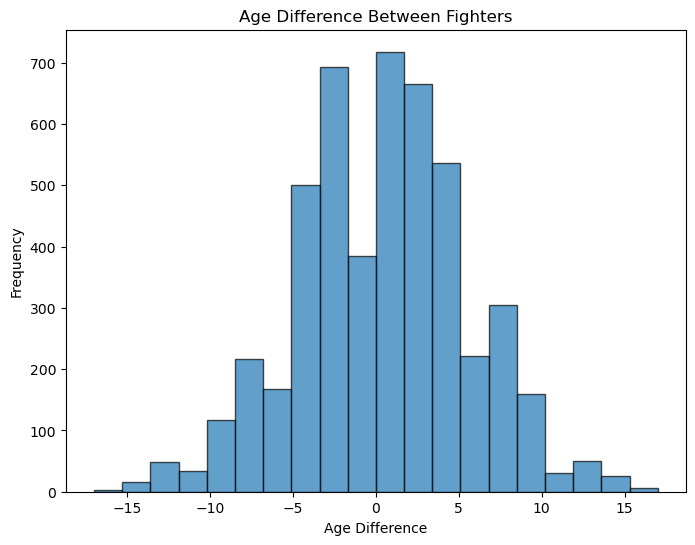

In [48]:
# Create a histogram for the 'age_dif' column
plt.figure(figsize=(8, 6))
plt.hist(ufcdata['age_dif'], bins=20, edgecolor='k', alpha=0.7)

# Customize the plot
plt.title('Age Difference Between Fighters')
plt.xlabel('Age Difference')
plt.ylabel('Frequency')

# Show the plot
plt.show()

#This histogram shows the age difference between fighters. 
#The majority of fights have an age difference of 0, 
#meaning the fighters are the same age more often than not


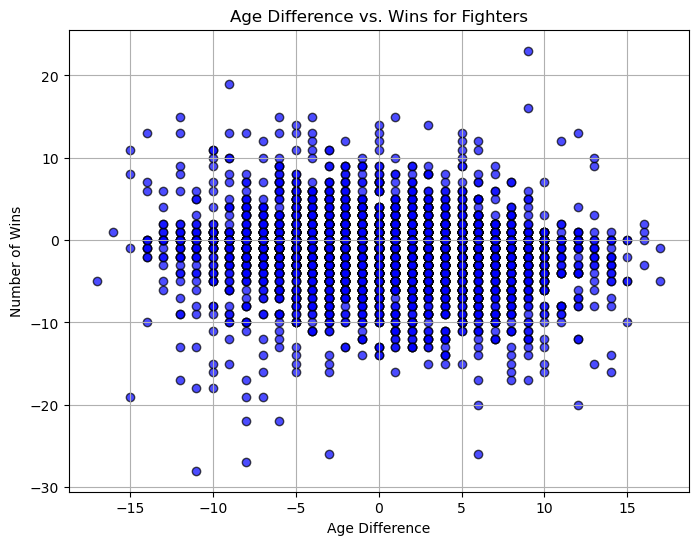

In [49]:
import matplotlib.pyplot as plt

# Each point on the plot represents a fighter, allowing you to visually assess if there's any 
# relationship between age difference and wins in your UFC dataset.
#The outliers on each end show that wins tend to increase or decrease when there is a huge age gap between fighters.
# Create a scatter plot for age vs. wins
plt.figure(figsize=(8, 6))
plt.scatter(ufcdata['age_dif'], ufcdata['win_dif'], c='blue', marker='o', edgecolors='k', alpha=0.7)

# Customize the plot
plt.title('Age Difference vs. Wins for Fighters')
plt.xlabel('Age Difference')
plt.ylabel('Number of Wins')

# Show the plot
plt.grid(True)
plt.show()


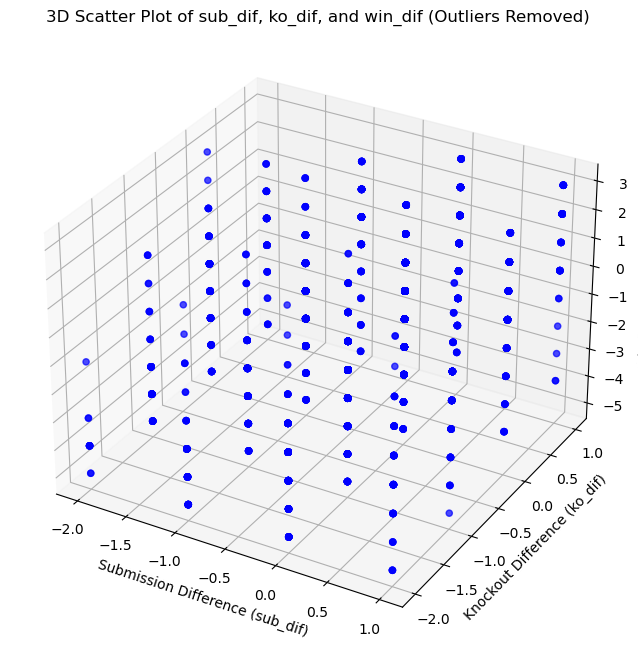

In [50]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Function to remove outliers based on IQR
def remove_outliers(data, column):
    Q1 = np.percentile(data[column], 25)
    Q3 = np.percentile(data[column], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Filter out outliers for 'sub_dif', 'ko_dif', and 'win_dif'
filtered_data = ufcdata.copy()
filtered_data = remove_outliers(filtered_data, 'sub_dif')
filtered_data = remove_outliers(filtered_data, 'ko_dif')
filtered_data = remove_outliers(filtered_data, 'win_dif')

# Create a 3D scatter plot for the filtered data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Use the filtered data for sub_dif, ko_dif, and win_dif
sub_dif = filtered_data['sub_dif']
ko_dif = filtered_data['ko_dif']
win_dif = filtered_data['win_dif']

# Create the 3D scatter plot
ax.scatter(sub_dif, ko_dif, win_dif, c='blue', marker='o', alpha=0.7)

# Customize the plot
ax.set_xlabel('Submission Difference (sub_dif)')
ax.set_ylabel('Knockout Difference (ko_dif)')
ax.set_zlabel('Win Difference (win_dif)')
ax.set_title('3D Scatter Plot of sub_dif, ko_dif, and win_dif (Outliers Removed)')

# Show the plot
plt.show()

#This 3d scatter plot shows the relationship between the three variables,
#and how they relate to each other.
#The majority of the data is clustered around the origin,
#meaning that most fights have a similar number of knockouts, submissions, and wins because fighters specialize in different areas.
#This is best viewed in jupyter notebook, as the plot is interactive and can be rotated to view from different angles.


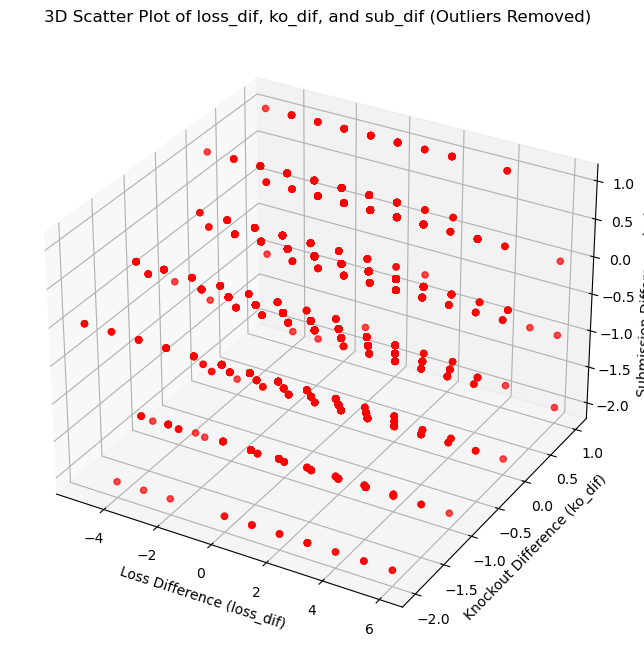

In [63]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Function to remove outliers based on IQR
def remove_outliers(data, column):
    Q1 = np.percentile(data[column], 25)
    Q3 = np.percentile(data[column], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Filter out outliers for 'loss_dif', 'ko_dif', and 'sub_dif'
filtered_data = ufcdata.copy()
filtered_data = remove_outliers(filtered_data, 'loss_dif')
filtered_data = remove_outliers(filtered_data, 'ko_dif')
filtered_data = remove_outliers(filtered_data, 'sub_dif')

# Create a 3D scatter plot for the filtered data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Use the filtered data for loss_dif, ko_dif, and sub_dif
loss_dif = filtered_data['loss_dif']
ko_dif = filtered_data['ko_dif']
sub_dif = filtered_data['sub_dif']

# Create the 3D scatter plot
ax.scatter(loss_dif, ko_dif, sub_dif, c='red', marker='o', alpha=0.7)

# Customize the plot
ax.set_xlabel('Loss Difference (loss_dif)')
ax.set_ylabel('Knockout Difference (ko_dif)')
ax.set_zlabel('Submission Difference (sub_dif)')
ax.set_title('3D Scatter Plot of loss_dif, ko_dif, and sub_dif (Outliers Removed)')

# Show the plot
plt.show()

#This is best viewed in jupyter notebook, as the plot is interactive and can be rotated to view from different angles.
#This 3d scatter plot shows the relationship between the three variables,
#and how they relate to each other.


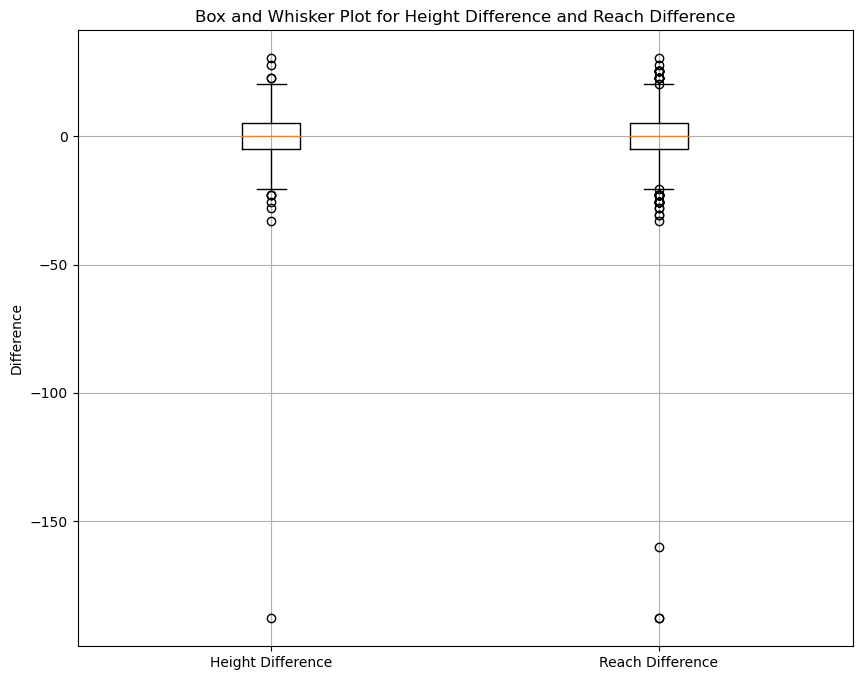

In [64]:
import matplotlib.pyplot as plt

# Create a box and whisker plot for height_dif and reach_dif
plt.figure(figsize=(10, 8))
plt.boxplot([ufcdata['height_dif'], ufcdata['reach_dif']], labels=['Height Difference', 'Reach Difference'])

# Customize the plot
plt.title('Box and Whisker Plot for Height Difference and Reach Difference')
plt.ylabel('Difference')
plt.grid(True)

# Show the plot
plt.show()


In [53]:
# To avoid overfitting, we will only focus on the Odds, Gender, then the differnces between the fighters in each category.

# Additionally, there were some incorrect values in the dataset for Significant Strikes, so it was removed as a possible feature. 
columns = ['R_odds','gender','lose_streak_dif',
       'win_streak_dif', 'longest_win_streak_dif', 'win_dif', 'loss_dif',
       'total_round_dif', 'ko_dif', 'sub_dif',
       'height_dif', 'reach_dif', 'age_dif','avg_sub_att_dif',
       'avg_td_dif']

X = ufcdata[columns]
y = ufcdata["Red Winner"]

print(ufcdata.shape)
print(X.shape)
print(y.shape)

# Split Data

X_train, X_test, y_train, y_test = train_test_split(
                                                    X,
                                                    y,
                                                    test_size=0.3,
                                                    stratify=y,random_state=50
                                                    )

(4896, 108)
(4896, 15)
(4896,)


In [54]:
# Dummy Classifier with baseline accuracy

dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(X_train,y_train)
baseline_acc = dummy_classifier.score(X_train,y_train)

print("Baseline Accuracy = ", baseline_acc)

Baseline Accuracy =  0.5838926174496645


In [55]:
# Create a bagging classifier
base_est = DecisionTreeClassifier()
model_bag = BaggingClassifier(base_est,random_state = 42,n_estimators=10)
model_bag.fit(X_train, y_train)
pred_bagging = model_bag.predict(X_test)
acc_b = accuracy_score(y_test, pred_bagging)

print('Bagging Accuracy = ', acc_b)

Bagging Accuracy =  0.5861130020422056


In [56]:
# Create a Random Forest Model

model_rf = RandomForestClassifier(n_estimators=100, max_features=7, random_state=42, min_samples_leaf=5, max_depth=5)
model_rf.fit(X_train, y_train)
predict_rf = model_rf.predict(X_test)
recall_rf = recall_score(y_test, predict_rf)
precision_rf = precision_score(y_test, predict_rf)
acc_rf = accuracy_score(y_test, predict_rf)
print("Random Forest Accuracy:",acc_rf)

# Compare Features of RF model.
feature_importances = model_rf.feature_importances_
features = X_train.columns
df = pd.DataFrame({'features': features, 'importance': feature_importances})
df = df.sort_values(by=["importance"],ascending=False)
print("Top 5 Features:\n",df[0:5])

Random Forest Accuracy: 0.6541865214431586
Top 5 Features:
            features  importance
0            R_odds    0.651705
12          age_dif    0.067359
14       avg_td_dif    0.057155
13  avg_sub_att_dif    0.036565
7   total_round_dif    0.030982


In [57]:
# check accuracy of random forest model
acc_rf = accuracy_score(y_test, predict_rf)
print("Random Forest Accuracy:",acc_rf)

Random Forest Accuracy: 0.6541865214431586


In [58]:
# Create an adaboost Model
base_est = DecisionTreeClassifier (max_depth=4)
ada = AdaBoostClassifier(base_est, n_estimators=200, random_state=42, learning_rate=.05)
ada.fit(X_train, y_train)
predict_ada = ada.predict(X_test)
acc_ada = accuracy_score(y_test,predict_ada)
print("Ada Boost Accuracy",acc_ada)

feature_importances = ada.feature_importances_
features = X_train.columns
df_ada = pd.DataFrame({'features': features, 'importance': feature_importances})
df_ada = df_ada.sort_values(by=["importance"],ascending=False)
print("Top 5 Features:\n",df_ada[0:5])

labels = pd.DataFrame(data=y_test)

print(labels.head())

Ada Boost Accuracy 0.6242341729067393
Top 5 Features:
            features  importance
0            R_odds    0.204988
14       avg_td_dif    0.114810
13  avg_sub_att_dif    0.113400
7   total_round_dif    0.104217
12          age_dif    0.086649
      Red Winner
2442           1
524            1
1845           1
3543           1
874            1


In [59]:
Zhang_v_Namajunas =[[-180,0,0,-4,-2,1,3,15,0,2,2.54,5.08,-3,.3,.65]]

print("Using the Random Forest model, we can predict that the Red_Fighter, Zhang will win, with a win probability of",model_rf.predict_proba(Zhang_v_Namajunas)[:,1])
impliedwinpercent = ((-(-180))/(-(-180)+100)*100)
print("Given the Vegas odds of -180, Zhang's implied win % was",impliedwinpercent)

Using the Random Forest model, we can predict that the Red_Fighter, Zhang will win, with a win probability of [0.55845177]
Given the Vegas odds of -180, Zhang's implied win % was 64.28571428571429


c:\Users\Thomas Gresco\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
